In [16]:
from keras.layers import Dense
# First, import the necessary GWpy modules
from gwpy.timeseries import TimeSeries
from gwpy.spectrogram import Spectrogram
import numpy as np
import h5py as h5
# Import Sequential from Keras
from keras.models import Sequential
import os

train_folder = 'D:\\Datasets\\g2net-detecting-continuous-gravitational-waves (1)\\train'
test_folder = 'D:\\Datasets\\g2net-detecting-continuous-gravitational-waves (1)\\test'

train_files = os.listdir(train_folder)
test_files = os.listdir(test_folder)

In [17]:
train_labels = 'D:\\Datasets\\g2net-detecting-continuous-gravitational-waves (1)\\train_labels.csv'

# Create a dictionary with train_files values as keys and train_labels values as values
train_labels_dict = {}
with open(train_labels, 'r') as f:
    for line in f:
        (key, val) = line.split(',')
        train_labels_dict[key] = val

# Remove "\n" from the end of the values
for key in train_labels_dict:
    train_labels_dict[key] = train_labels_dict[key].rstrip()

print(train_labels_dict)

{'id': 'target', '001121a05': '1', '004f23b2d': '1', '00a6db666': '1', '00f36a6ac': '1', '010a387db': '1', '0197bacf8': '1', '01b8b67f3': '1', '01bcf6533': '0', '01dba9731': '1', '021248995': '1', '02887d232': '1', '029ed046c': '0', '02c478b09': '1', '02c8f43f3': '0', '03189bb3d': '1', '0367dc82c': '1', '04673609a': '1', '047e6e2a3': '1', '0517ef7fe': '1', '05c0675fe': '1', '05cdc0769': '0', '05f0aef12': '1', '067b3fb4b': '1', '06e321c6e': '0', '07b326ea1': '1', '08a060dad': '1', '08c444d66': '1', '09134f1c2': '1', '0920a4276': '1', '09531cde3': '1', '097370861': '1', '09e55aeba': '0', '09ecddbba': '1', '0ba188c57': '1', '0bc8216f2': '1', '0c102ab5a': '1', '0c30b3fef': '0', '0c55d030c': '0', '0d0ad0b19': '1', '0dc4c8ed0': '1', '0e39a18bf': '1', '0e60d4893': '0', '0e66d0460': '0', '0eb30f7c4': '0', '0ebe28dd5': '0', '0ee090299': '1', '0f53d8b96': '1', '10dfa2ed6': '0', '10eaa1cb2': '0', '113ef0cbc': '0', '1185806d8': '1', '119610501': '1', '123594dc7': '1', '1282f6c1f': '1', '12f0fd6fd'

[[0.05139266 0.10288228 0.54230016 ... 0.49721093 0.73528003
  0.89584726]
 [0.25007084 0.46617327 0.11022625 ... 0.58144561 0.61259336
  0.87893432]
 [0.00706332 0.46970619 0.96533716 ... 0.35021134 0.17241595
  0.22693649]
 ...
 [0.61546184 0.8828255  0.53161631 ... 0.76444521 0.62933258
  0.04959724]
 [0.38497014 0.8023582  0.79797151 ... 0.10013846 0.06698909
  0.81390245]
 [0.81403995 0.51496701 0.50777891 ... 0.42978458 0.06263298
  0.60551103]]


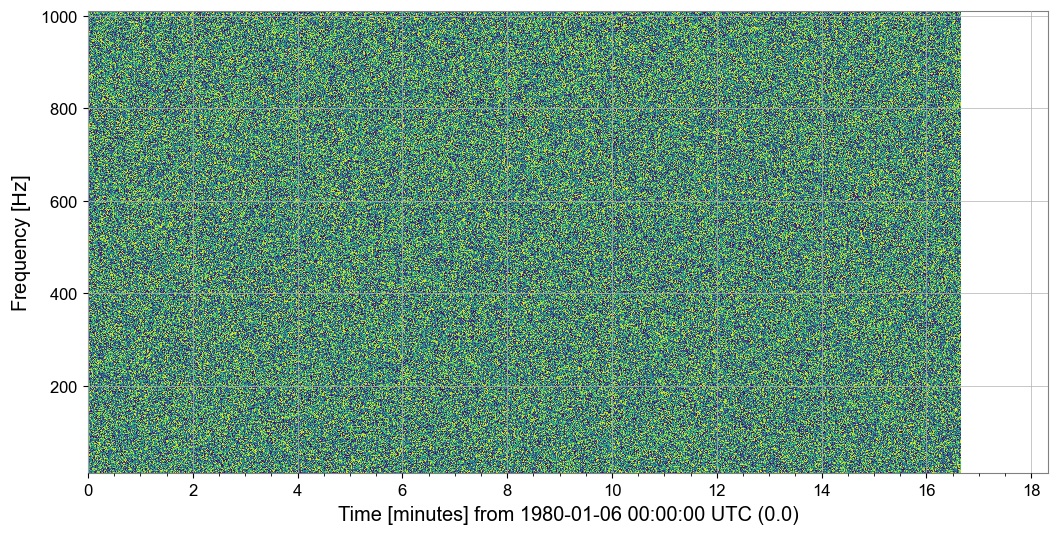

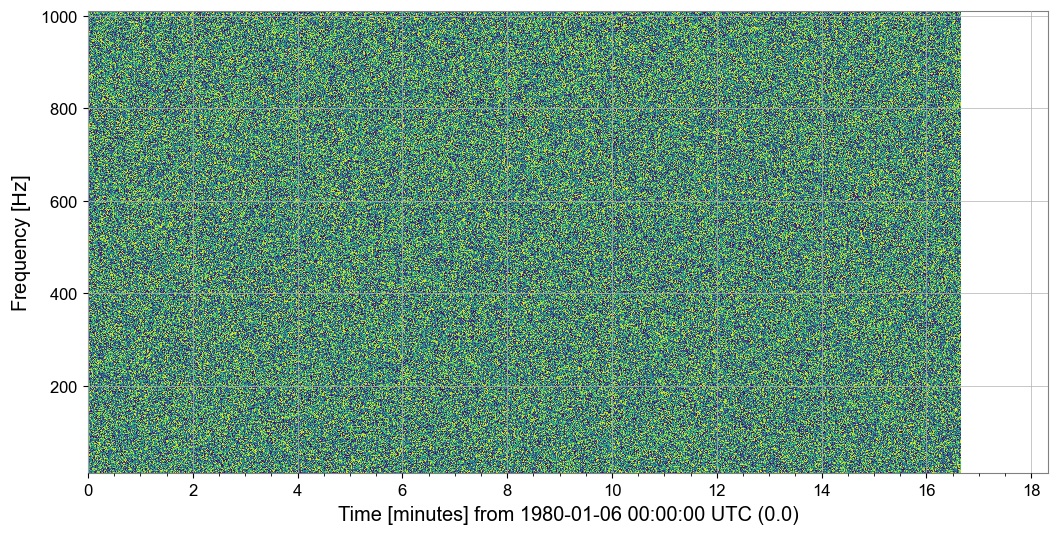

In [18]:
import numpy
from gwpy.spectrogram import Spectrogram
from gwpy.timeseries import TimeSeries
import sys

# Create a random spectrogram using GWpy
data = numpy.random.random((1000, 1000))

print(data)

spec = Spectrogram(data, f0=10, df=1, t0=0, dt=1)

# Show the spectrogram
spec.plot()

In [28]:
min_freq = 0
max_freq = 0

for file in train_files:
    # Open the HDF5 file
    with h5.File(train_folder + '\\' + file, 'r') as f:
        # Extract the SFTs and timestamps data from the HDF5 file

        # Calculate the minimum and maximum frequency in the SFTs

        print(file['frequency_Hz'])
        print(type(np.min(file['frequency_Hz'])))
        if np.min(file['frequency_Hz'][:]) < min_freq:
            min_freq = np.min(file['frequency_Hz'][:])
        if np.max(file['frequency_Hz'][:]) > max_freq:
            max_freq = np.max(file['frequency_Hz'][:])


    print(min_freq)


TypeError: string indices must be integers

C:\Users\noudy\DataSpellProjects\Gravitational\DS_venv\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\noudy\DataSpellProjects\Gravitational\DS_venv\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=360).
C:\Users\noudy\DataSpellProjects\Gravitational\DS_venv\lib\site-packages\gwpy\plot\axes.py:78: UserWarning: Attempting to set identical left == right == 512.0 results in singular transformations; automatically expanding.
  return func(self, **kw)


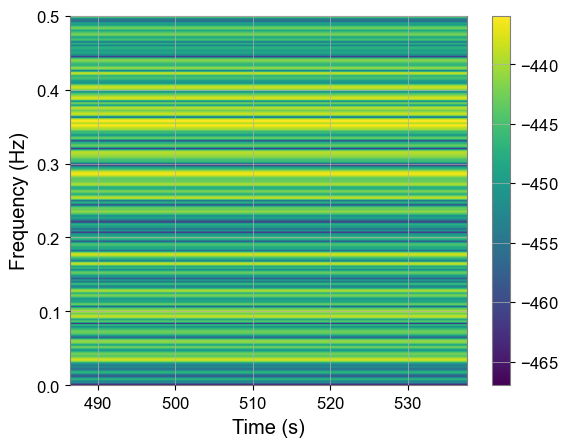

In [29]:
import numpy
from gwpy.spectrogram import Spectrogram
from gwpy.timeseries import TimeSeries
import sys

import numpy as np
from gwpy.spectrogram import Spectrogram

# Open the HDF5 file
with h5.File(train_folder + '\\' + train_files[0], 'r') as f:
    # Extract the SFTs and timestamps data from the HDF5 file
    H1_group = f['/001121a05/H1']
    H1_SFTs = H1_group['SFTs']
    H1_SFTs = np.array(H1_SFTs)
    # Convert the values within the SFTs array to float
    H1_SFTs = H1_SFTs.astype(float)


import matplotlib.pyplot as plt
import numpy as np

# Convert the complex-valued SFTs to real-valued spectrogram data
H1_SFTs_real = np.real(H1_SFTs)

# Create the spectrogram using matplotlib's specgram function
spectrogram, freqs, bins, im = plt.specgram(H1_SFTs_real, Fs=1, NFFT=1024, noverlap=0)

# Set the x and y axis labels
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Set the x and y axis limits
plt.xlim([bins[0], bins[-1]])
plt.ylim([freqs[0], freqs[-1]])

# Add a colorbar
plt.colorbar()

# Show the plot
plt.show()

In [37]:
import numpy as np
from gwpy.spectrogram import Spectrogram

# Open the HDF5 file
with h5.File(train_folder + '\\' + train_files[1], 'r') as f:
    # Extract the SFTs and timestamps data from the HDF5 file
    H1_group = f['/004f23b2d/H1']
    H1_SFTs = H1_group['SFTs']
    H1_SFTs = np.array(H1_SFTs)
    H1_timestamps_GPS = H1_group['timestamps_GPS']
    H1_timestamps_GPS = np.array(H1_timestamps_GPS)
    frequency_Hz = f['/004f23b2d/frequency_Hz']
    frequency_Hz = np.array(frequency_Hz)

print(H1_timestamps_GPS)
print(len(H1_timestamps_GPS))
# Print average difference between timestamps
print(np.average(np.diff(H1_timestamps_GPS)))
print(len(H1_SFTs))



# Create a TimeSeries object from the SFTs and timestamps data
H1_ts = TimeSeries(H1_SFTs.flatten(), t0=H1_timestamps_GPS[0], dt=1/frequency_Hz[0])

# Create a spectrogram from the TimeSeries object
H1_spec = Spectrogram(H1_ts, fftlength=1, overlap=0.5)

# Plot the spectrogram
plot = H1_spec.plot()
ax = plot.gca()
ax.set_xlabel('Time [s]')
ax.set_ylabel('Frequency [Hz]')
plot.show()

[1238171500 1238173300 1238175100 ... 1248527345 1248529145
 1248530945]
4546
2279.305830583058
360


ValueError: Cannot generate Spectrogram with 1-dimensional data

In [ ]:
# Next, create a function to train a model using the data
def train_model(X_train, y_train):
    # Create a neural network model
    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))

    # Train the model on the training data
    model.fit(X_train, y_train)
    # Return the trained model
    return model

# Next, create a function to test the model on a test set
def test_model(model, X_test, y_test):
    # Make predictions on the test data using the model
    y_pred = model.predict(X_test)
    # Evaluate the model's performance by comparing the predictions to the true labels
    accuracy = ...
    return accuracy

# Finally, load the data and train and test the model
train_files = ['004f23b2d.hdf5']

# Load the training data
X_train = []
y_train = []
for file in train_files:
    H1_spec, L1_spec = load_data(file)
    # Concatenate the spectrogram data from both detectors
    spec = np.concatenate((H1_spec, L1_spec), axis=1)
    # Add the spectrogram data to the list of training data
    X_train.append(spec)
    # Determine the label for this data (1 if a signal is present, 0 if not)
    label = ...
    # Add the label to the list of labels
    y_train.append(label)

# Convert the lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Train the model
model = train_model(X_train, y_train)

# Load the test data
X_test = []
y_test = []
for file in test_files:
    H1_spec, L1_spec = load_data(file)
    # Concatenate the spectrogram data from both detectors
    spec = np.concatenate((H1_spec, L1_spec), axis=1)
    # Add the spectrogram data to the list of test data
    X_test.append(spec)
    # Determine the label for this data (1 if a signal is present, 0 if not)
    label = ...
    # Add the label to the list of labels
    y_test.append(label)

# Convert the lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Test the model
accuracy = test_model(model, X_test, y_test)
print(f'Model accuracy: {accuracy}')